In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Stochastic Volatility Models

SDEs of the form

$$\textrm{d}X_t = \mu(t, X_t)\textrm{d}t + \sigma(t, X_t)\textrm{d}W_t$$

This means that the drift $\mu$ and volatility $\sigma$ are *deterministic* functions of time $t$ and/or asset value $X_t$.  This setup gives us a wide variety of models, but often isn't enough to accurately model assets.  One particularly important modification is to let the volatility $\sigma$ itself be a random variable.  That is, we want

$$\textrm{d}X_t = \mu(t, X_t)\textrm{d}t + \sigma_t\textrm{d}W_t$$

In principle, $\sigma_t$ can be any stochastic process.  In practice, we usually let $\sigma_t = f(Y_t)$ where $f$ is a deterministic function and $Y_t$ is a stochastic process governed by another SDE.

## Heston Model

As an example, the Heston model for an asset price $X_t$ is the system of SDEs

$$\left\{ \begin{array}{rcl} \textrm{d}X_t &=& \mu X_t \,\textrm{d}t + \sqrt{Y_t}X_t\,\textrm{d}W^{(1)}_t \\ \textrm{d}Y_t &=& \alpha\left(m - Y_t\right)\,\textrm{d}t + \eta\sqrt{Y_t}\,\textrm{d}W^{(2)}_t \end{array} \right.$$

where $W^{(1)}_t$ and $W^{(2)}_t$ are (possibly correlated) standard Brownian motions.  This model assumes that the asset price follows a geometric brownian motion process, but that the volatility of the asset is $\sigma_t = \sqrt{Y_t}$, where $Y_t$ follows a CIR process.

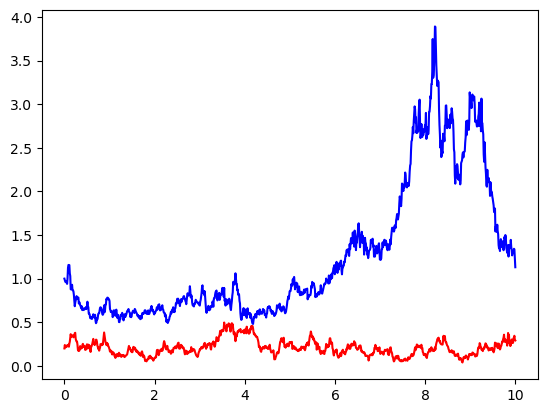

In [7]:
T = 10
x0 = 1
y0 = 0.2
mu = 0.1
m = 0.2
alpha = 3
eta = 0.5

N = 1000
dt = T / N
t = np.linspace(0, T, N)

x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0
y[0] = y0

for k in range(N-1):
    y[k+1] = y[k] + alpha * (m - y[k]) * dt + eta * np.sqrt(y[k]) * np.sqrt(dt) * np.random.randn()
    x[k+1] = x[k] + mu * x[k] * dt + np.sqrt(y[k]) * x[k] * np.sqrt(dt) * np.random.randn()

plt.plot(t, x, 'b', t, y, 'r')
plt.show()

### Simulate the Heston model with correlated Brownian motions $W^{(1)}_t$ and $W^{(2)}_t$ with correlation coefficient $\rho = 0.5$.

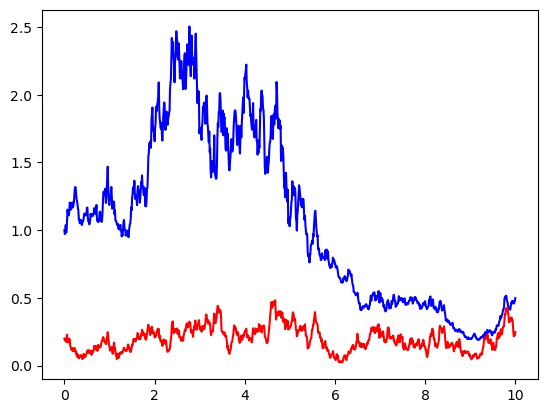

In [17]:
T = 10
x0 = 1
y0 = 0.2
mu = 0.1
m = 0.2
alpha = 3
eta = 0.5
rho = 0.5

N = 1000
dt = T / N
t = np.linspace(0, T, N)
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0
y[0] = y0


for k in range(N-1):
    z = np.random.randn(2)

    z[1] = rho * z[0] + np.sqrt(1 - rho ** 2) * z[1]

    y[k+1] = y[k] + alpha * (m - y[k]) * dt + eta * np.sqrt(y[k]) * np.sqrt(dt) * z[1]
    x[k+1] = x[k] + mu * x[k] * dt + np.sqrt(y[k]) * x[k] * np.sqrt(dt) * z[0]

plt.plot(t, x, 'b', t, y, 'r')
plt.show()